In [3]:
#       _ _,---._
#    ,-','       `-.___
#   /-;'               `._
#  /\/          ._   _,'o \
# ( /\       _,--'\,','"`. )
#  |\      ,'o     \'    //\
#  |      \        /   ,--'""`-.
#  :       \_    _/ ,-'         `-._
#   \        `--'  /                )
#    `.  \`._    ,'     ________,','
#      .--`     ,'  ,--` __\___,;'
#       \`.,-- ,' ,`_)--'  /`.,'
#        \( ;  | | )      (`-/
#          `--'| |)       |-/
#            | | |        | |
#            | | |,.,-.   | |_
#            | `./ /   )---`  )
#           _|  /    ,',   ,-'
#          ,'|_(    /-<._,' |--,
#          |    `--'---.     \/ \
#          |          / \    /\  \
#        ,-^---._     |  \  /  \  \
#     ,-'        \----'   \/    \--`.
#    /            \              \   \
#######################################
#                Gruy                 #                  
#######################################

### Import Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

### import data_set

In [61]:
x = load_boston()

### Transformer le jeux de donnée en data_fram

In [62]:
# pour avoir le nom des colonnes
df_x = pd.DataFrame(x.data, columns=x.feature_names)
# taille data_set
df_x.shape

(506, 13)

In [65]:
# creatiion de la Cible
df_x["MEDV"] = x.target

In [68]:
# suppretion de la cible dans le dat_set
x = df_x.drop("MEDV",1)
# Creation de y cible
y = df_x["MEDV"]

In [69]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Filter Mehtod

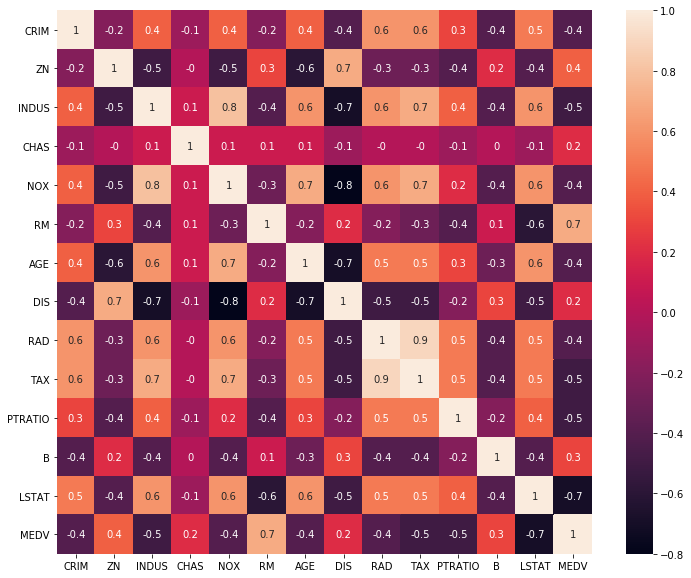

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
# def correlation
cor = df_x.corr()
# taille plt
plt.figure(figsize=(12,10))
matrice_corr = df_x.corr().round(1)
sns.heatmap(data=matrice_corr,annot=True)

In [77]:
# correlation sans la cible
cor_target = abs(cor["MEDV"])
# Selection des features les plus corrélé
super_features = cor_target[cor_target > 0.5] #cor superieur à 0.5
super_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [79]:
# Rm, Ptratio, Lstat sont les featurs > 0.5
# regardon lesquel de c features sont les plus corélé entre elle
df_x[["LSTAT","PTRATIO","RM"]].corr()

,LSTAT,PTRATIO,RM
LSTAT,1.000000,0.374044,-0.613808
PTRATIO,0.374044,1.000000,-0.355501
RM,-0.613808,-0.355501,1.000000


#### Rm and Lstat sont les plus fortement corélée entre elle, on ne garde donc que Lstat (un peu mieux corrélé avec Ptratio)
#### nous gardon donc Ptratio et Lstat comme featurs

### import pour la fonction de regression lineraire

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [85]:
def linearRegression (X,y) : 
    ## Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    ## entrainemennt model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    ### Prediction sur l'ensemble du test
    y_pred = regressor.predict(X_test)
    coef= regressor.coef_
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 =1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    print('Coefficients : ',regressor.coef_)
    print('MAE : ',mae)
    print('MSE : ',mse)
    print('R² : ',r2)
    print('Adjusted R² : ',adj_r2)
    # un petit graph ca fait toujours plaisir
    to_plot = pd.DataFrame([[y_test.values[i], y_pred[i]] for i in range(len(y_test))], columns=['test', 'pred']).sort_values('test')
    plt.scatter(np.arange(len(y_test)), to_plot['test'], c='red')
    plt.plot(np.arange(len(y_test)), to_plot['pred'])
    return [mae,mse,rmse,r2,adj_r2]

### Regression lineaire pour la Filter Method

Coefficients :  [-0.80132331 -1.36444626]
MAE :  5.136709198623113
MSE :  51.48347245085404
R² :  0.36774580178654825
Adjusted R² :  0.354972989701428


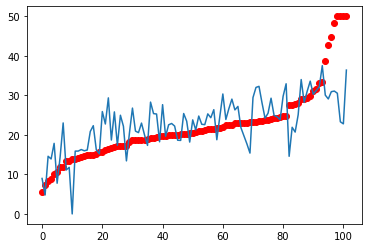

In [86]:
linear_reg1 = linearRegression(x[["LSTAT", "PTRATIO"]], y)

### Conclusion pas pas terrible R² a 0.36

### Backward Elimination

In [87]:
import statsmodels.api as sm

In [89]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 22 Apr 2020   Prob (F-statistic):                        0.00
Time:                        20:52:19   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""